In [1]:
import pandas as pd
import numpy as np

In [2]:
sms_data = pd.read_csv('sms_spam.csv', encoding='latin1')
sms_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
sms_data.shape

(5572, 5)

# Data Cleaning for sms_data

In [4]:
sms_data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [5]:
sms_data.sample(5)

,v1,v2
1967,ham,Even i cant close my eyes you are in me our va...
1740,spam,UR GOING 2 BAHAMAS! CallFREEFONE 08081560665 a...
2598,ham,Okie... Thanx...
2554,ham,I'll reach in ard 20 mins ok...
2937,ham,Hey i've booked the pilates and yoga lesson al...


In [6]:
sms_data.rename(columns={'v1':'target','v2':'text'},inplace=True)
sms_data.sample(5)

,target,text
18,ham,Fine if thatåÕs the way u feel. ThatåÕs the wa...
3663,ham,Huh? 6 also cannot? Then only how many mistakes?
1589,ham,I love you. You set my soul on fire. It is not...
4043,ham,"Yes, my reg is Ciao!"
4138,ham,Ever green quote ever told by Jerry in cartoon...


In [7]:
#Data encoding
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [8]:
sms_data['target']=encoder.fit_transform(sms_data['target'])
sms_data.sample(10)

,target,text
3859,0,Yep. I do like the pink furniture tho.
3473,0,", how's things? Just a quick question."
4211,1,Missed call alert. These numbers called but le...
5163,0,Ok leave no need to ask
1945,0,Can Ì_ call me at 10:10 to make sure dat i've ...
4391,0,what are your new years plans?
3945,0,How u doin baby girl ?? hope u are okay every ...
3071,0,Ok lor... But buy wat?
5377,1,The current leading bid is 151. To pause this ...
25,0,Just forced myself to eat a slice. I'm really ...


In [9]:
#missing values
sms_data.isnull().sum()

target    0
text      0
dtype: int64

In [10]:
#duplicate values
sms_data.duplicated().sum()

403

In [11]:
#Removing duplicates
sms_data.drop_duplicates(keep='first',inplace=True)
sms_data.duplicated().sum()

0

In [12]:
sms_data.shape

(5169, 2)

# EDA

In [13]:
sms_data['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x1f272d12af0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

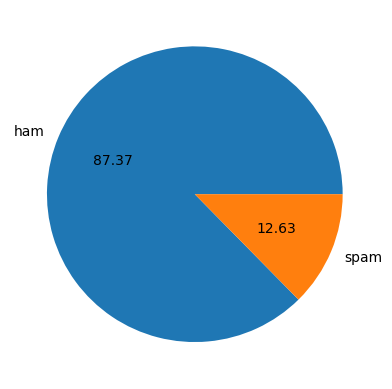

In [14]:
import matplotlib.pyplot as plt
plt.pie(sms_data['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')

# You can see the data is imbalanced

In [15]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
#no of characters
sms_data['num_chars']=sms_data['text'].apply(len)

In [17]:
sms_data.head()

,target,text,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
# no of words
sms_data['num_words']=sms_data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [19]:
sms_data.sample(5)

,target,text,num_chars,num_words
746,0,"I promise to take good care of you, princess. ...",110,28
3995,0,We'll you pay over like &lt;#&gt; yrs so its ...,63,19
5452,0,What???? Hello wats talks email address?,40,11
4990,0,We made it! Eta at taunton is 12:30 as planned...,97,25
2398,0,YO YO YO BYATCH WHASSUP?,24,6


In [20]:
print(nltk.word_tokenize('Omg how did u know what I ate?'))

['Omg', 'how', 'did', 'u', 'know', 'what', 'I', 'ate', '?']


In [21]:
# no of sentences
sms_data['num_sentences']=sms_data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [22]:
sms_data.sample(5)

,target,text,num_chars,num_words,num_sentences
2696,0,Nope but i'm going home now then go pump petro...,80,19,1
3959,0,I sent lanre fakeye's Eckankar details to the ...,54,11,1
23,0,Aft i finish my lunch then i go str down lor. ...,88,23,3
402,0,The hair cream has not been shipped.,36,8,1
4822,0,:-) :-),7,6,1


In [23]:
#ham
sms_data[sms_data['target']==0][['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [24]:
#spam
sms_data[sms_data['target']==1][['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


<AxesSubplot:xlabel='num_chars', ylabel='Count'>

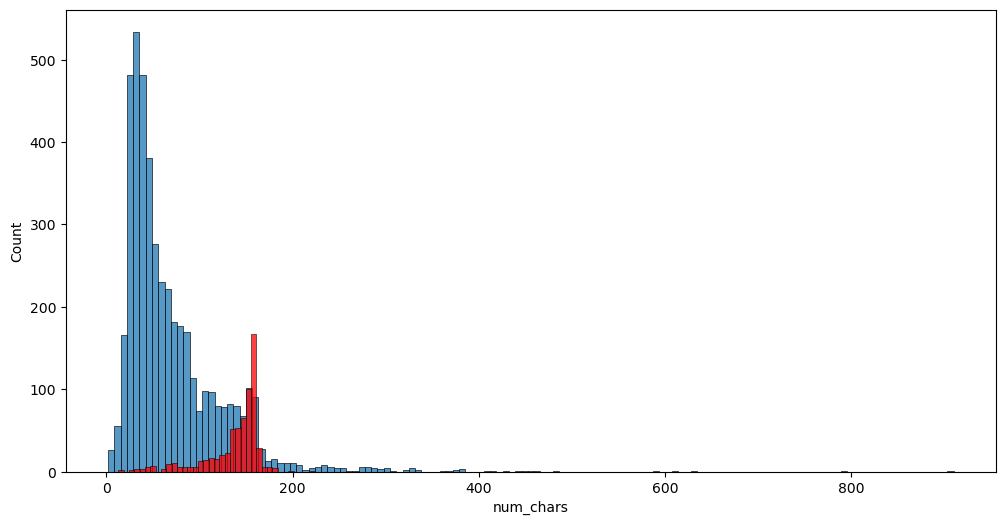

In [25]:
#Visualizations
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(sms_data[sms_data['target']==0]['num_chars'])
sns.histplot(sms_data[sms_data['target']==1]['num_chars'],color='red')

1. In the above histogram, you can observe that above 75% of spam messages are having characters greater than their average characters in a spam message.
2. Only more than half of ham messages are having  characters greater than their average characters in a ham message(Not spam).

<AxesSubplot:xlabel='num_words', ylabel='Count'>

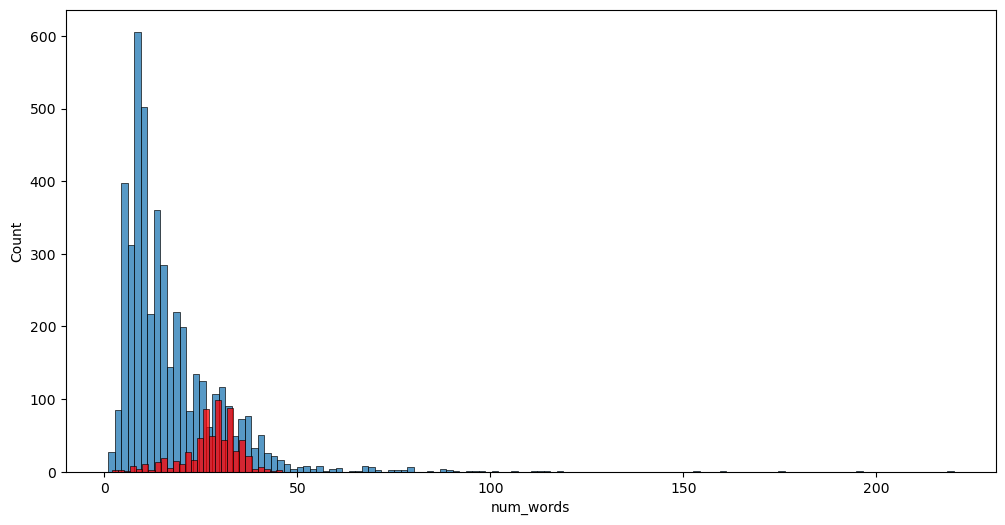

In [26]:
plt.figure(figsize=(12,6))
sns.histplot(sms_data[sms_data['target']==0]['num_words'])
sns.histplot(sms_data[sms_data['target']==1]['num_words'],color='red')

1. In the above histogram, you can observe that above 75% of spam messages are having words greater than their average words in a spam message.
2. Only more than half of ham messages are having  words greater than their average words in a ham message(Not spam).

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

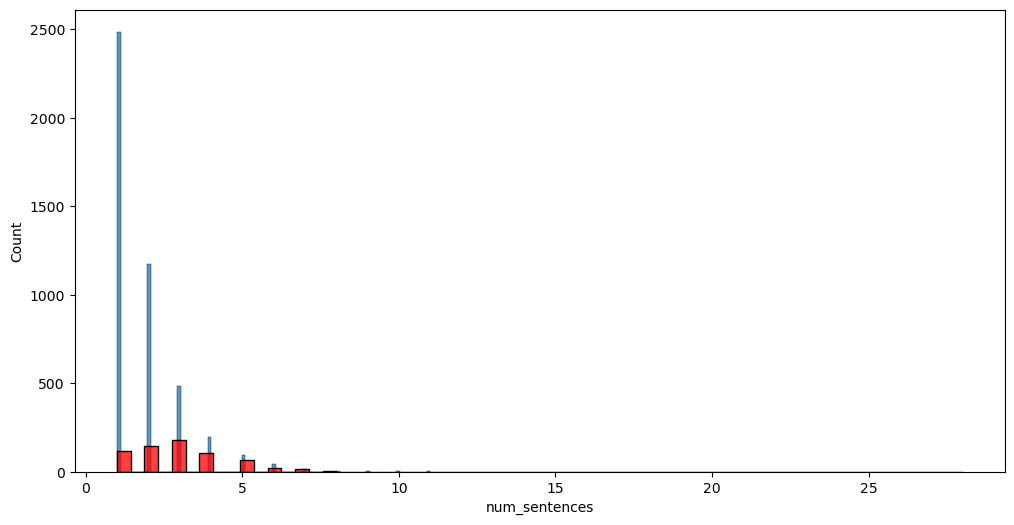

In [27]:
plt.figure(figsize=(12,6))
sns.histplot(sms_data[sms_data['target']==0]['num_sentences'])
sns.histplot(sms_data[sms_data['target']==1]['num_sentences'],color='red')

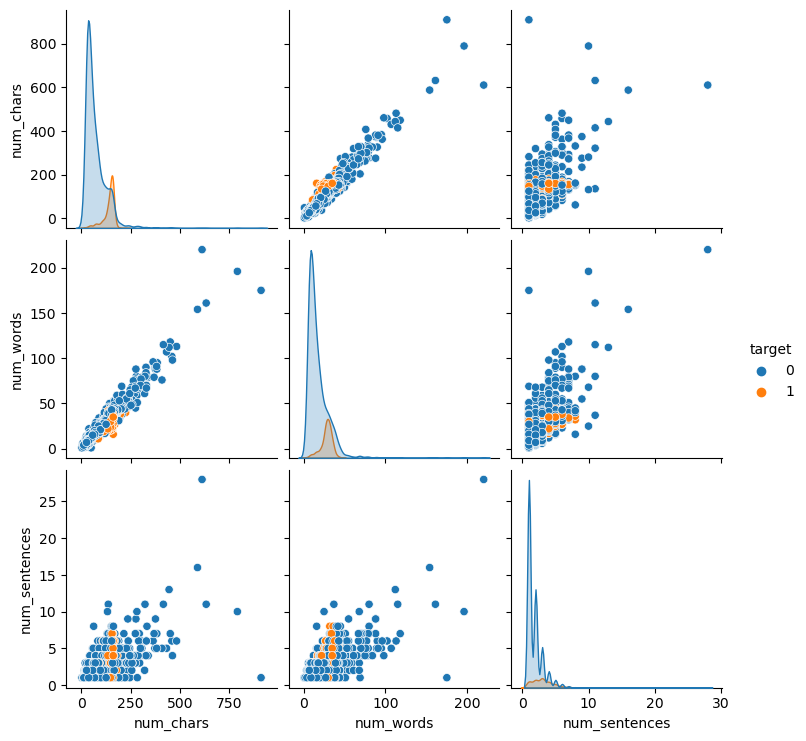

In [28]:
sns.pairplot(sms_data,hue='target')

<AxesSubplot:>

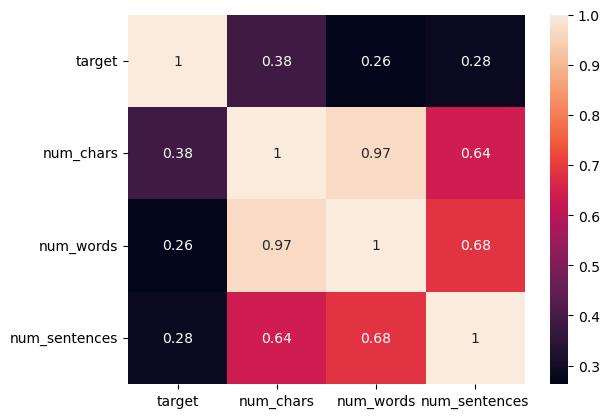

In [29]:
sns.heatmap(sms_data.corr(),annot=True)

# Data Preprocessing
1. Lower case
2. Tokenization
3. Removing special characters
4. Removing stop words and punctuation
5. Stemming

In [30]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [32]:
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [33]:
def transform_text(text):
    text= text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [34]:
transform_text(sms_data['text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [35]:
sms_data['transformed_text']=sms_data['text'].apply(transform_text)

In [36]:
sms_data.sample(5)

,target,text,num_chars,num_words,num_sentences,transformed_text
4865,0,"Oh! Shit, I thought that was your trip! Looooo...",299,70,5,oh shit thought trip loooooool make much sens ...
306,0,Jos ask if u wana meet up?,26,8,1,jo ask u wana meet
355,0,Thank You for calling.Forgot to say Happy Onam...,202,38,1,thank say happi onam fine rememb met insur qat...
5120,1,PRIVATE! Your 2003 Account Statement for 078,44,8,2,privat 2003 account statement 078
3137,0,Wat r u doing now?,18,6,1,wat r u


In [37]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [38]:
spam_wc=wc.generate(sms_data[sms_data['target']==1]['transformed_text'].str.cat(sep=" "))

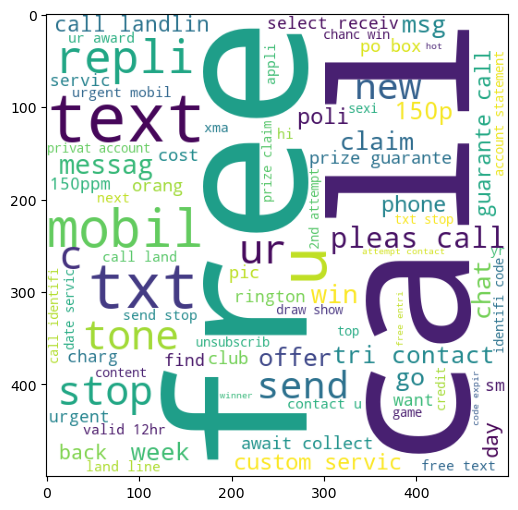

In [39]:
plt.figure(figsize=(18,6))
plt.imshow(spam_wc)

In [40]:
ham_wc=wc.generate(sms_data[sms_data['target']==0]['transformed_text'].str.cat(sep=" "))

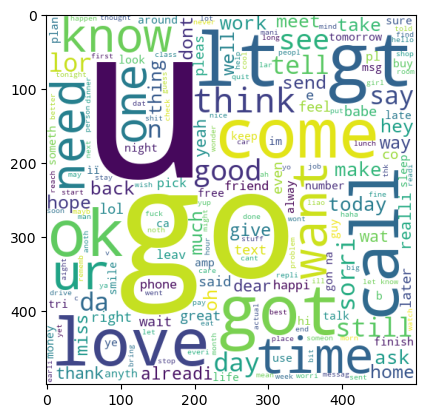

In [41]:
#plt.figure(figsize=(10,6))
plt.imshow(spam_wc)

In [42]:
spam_corpus=[]
for msg in sms_data[sms_data['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [43]:
len(spam_corpus)

9939

In [44]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))[0]

0        call
1        free
2           2
3         txt
4        text
5           u
6          ur
7       mobil
8        stop
9       repli
10      claim
11          4
12      prize
13        get
14        new
15     servic
16       tone
17       send
18     urgent
19      nokia
20    contact
21      award
22      phone
23       cash
24      pleas
25       week
26        win
27          c
28    collect
29        min
Name: 0, dtype: object

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


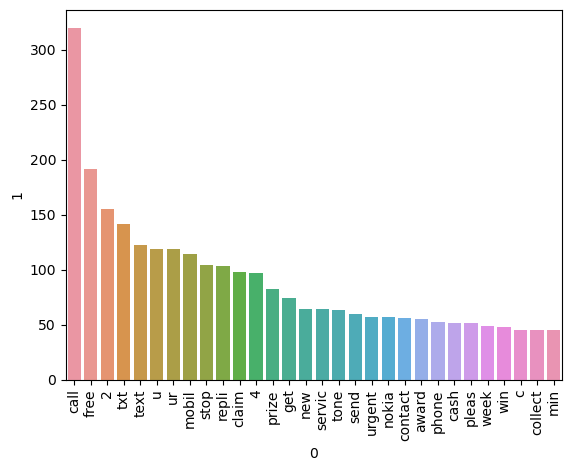

In [45]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [46]:
ham_corpus=[]
for msg in sms_data[sms_data['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [47]:
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


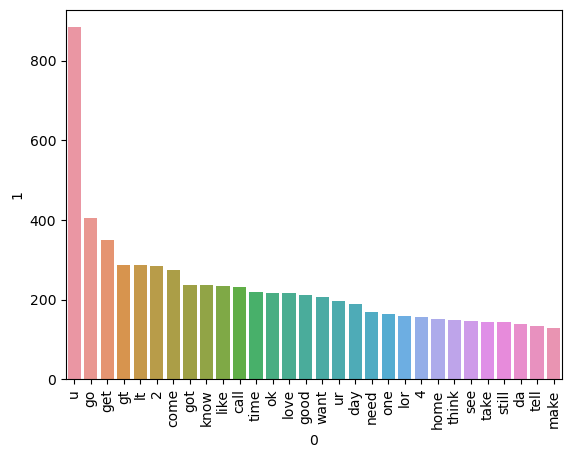

In [48]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [49]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer(max_features=3000)
tf=TfidfVectorizer(max_features=3000)
# TfidfVectorizer Weighs terms based on their frequency in the document and the entire corpus,
# which reduces the impact of common words.

In [50]:
X_cv=cv.fit_transform(sms_data['transformed_text']).toarray()
X_tf=tf.fit_transform(sms_data['transformed_text']).toarray() #better to use this thing

In [51]:
X_tf.shape

(5169, 3000)

In [52]:
y=sms_data['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [87]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X_tf,y,test_size=0.2,random_state=2)

In [88]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [92]:
gnb=GaussianNB()
mnb1=MultinomialNB()
bnb=BernoulliNB()

In [93]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [94]:
mnb1.fit(X_train,y_train)
y_pred1=mnb1.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [95]:
bnb.fit(X_train,y_train)
y_pred1=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


 Finally selected MultinomialNB with TfidfVectorizer 

In [96]:
# Let's try few more classification models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [97]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [98]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [99]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [100]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [101]:
train_classifier(knc,X_train,y_train,X_test,y_test)

(0.9052224371373307, 1.0)

In [102]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9323017408123792
Precision -  0.8333333333333334
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8671875
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.971953578336557
Precision -  0.943089430894309


In [103]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [104]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.971954,0.943089
6,AdaBoost,0.960348,0.929204
9,GBDT,0.946809,0.919192
7,BgC,0.957447,0.867188


In [105]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [106]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.974855
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.971954
7,AdaBoost,Accuracy,0.960348
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.957447


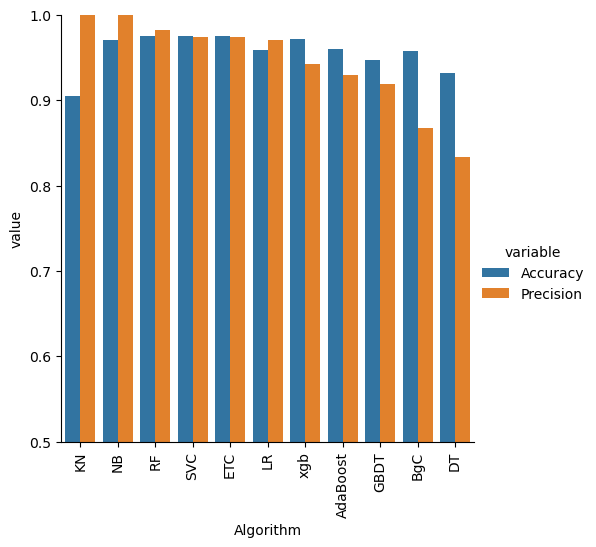

In [107]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# From above graph, NB has highest precision with considerable high accuracy 

In [108]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [109]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [110]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [112]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [113]:
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("Cython version:", Cython.__version__)

Pandas version: 1.3.5
NumPy version: 1.26.2
Cython version: 0.29.32


In [114]:
!python --version


Python 3.9.13


In [117]:
text_transform = transform_text("Discover your future with Curtin Uni Find out our students what it’s like to study at Curtin")  # Text preprocessing
    # Vectorization
text_vector = tf.transform([text_transform])
print(f"Vector shape: {text_vector.shape}")
    

result = mnb1.predict(text_vector)[0]
if result == 1:
    print('Spam')
else:
    print('Not Spam')        

Vector shape: (1, 3000)
Not Spam


In [118]:
pickle.dump(mnb1,open('mnb1_model.pkl','wb'))

In [120]:
sms_data['transformed_text'][5377]

'current lead bid paus auction send custom care 08718726270'

In [121]:
sms_data['transformed_text'][5371]

'lol oh got friend dog'

In [ ]:
import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
